In [1]:
from google.colab import files
uploaded=files.upload()

Saving IRIS.csv to IRIS.csv


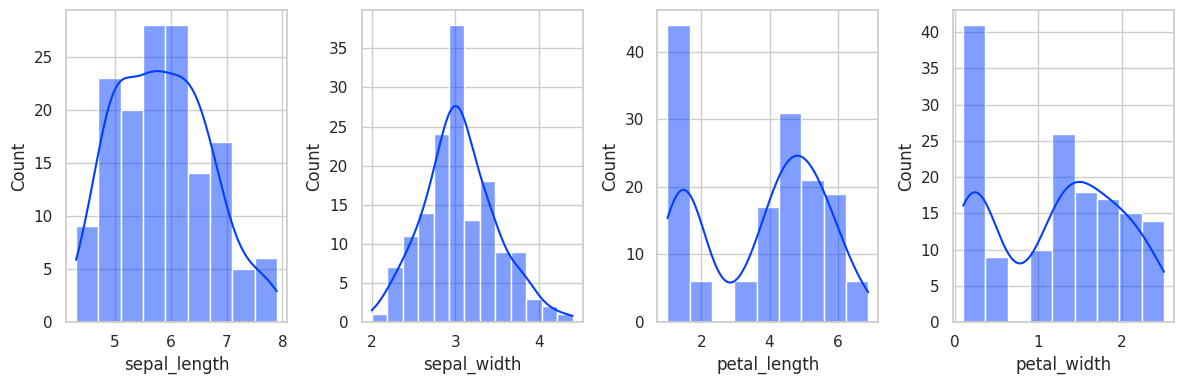

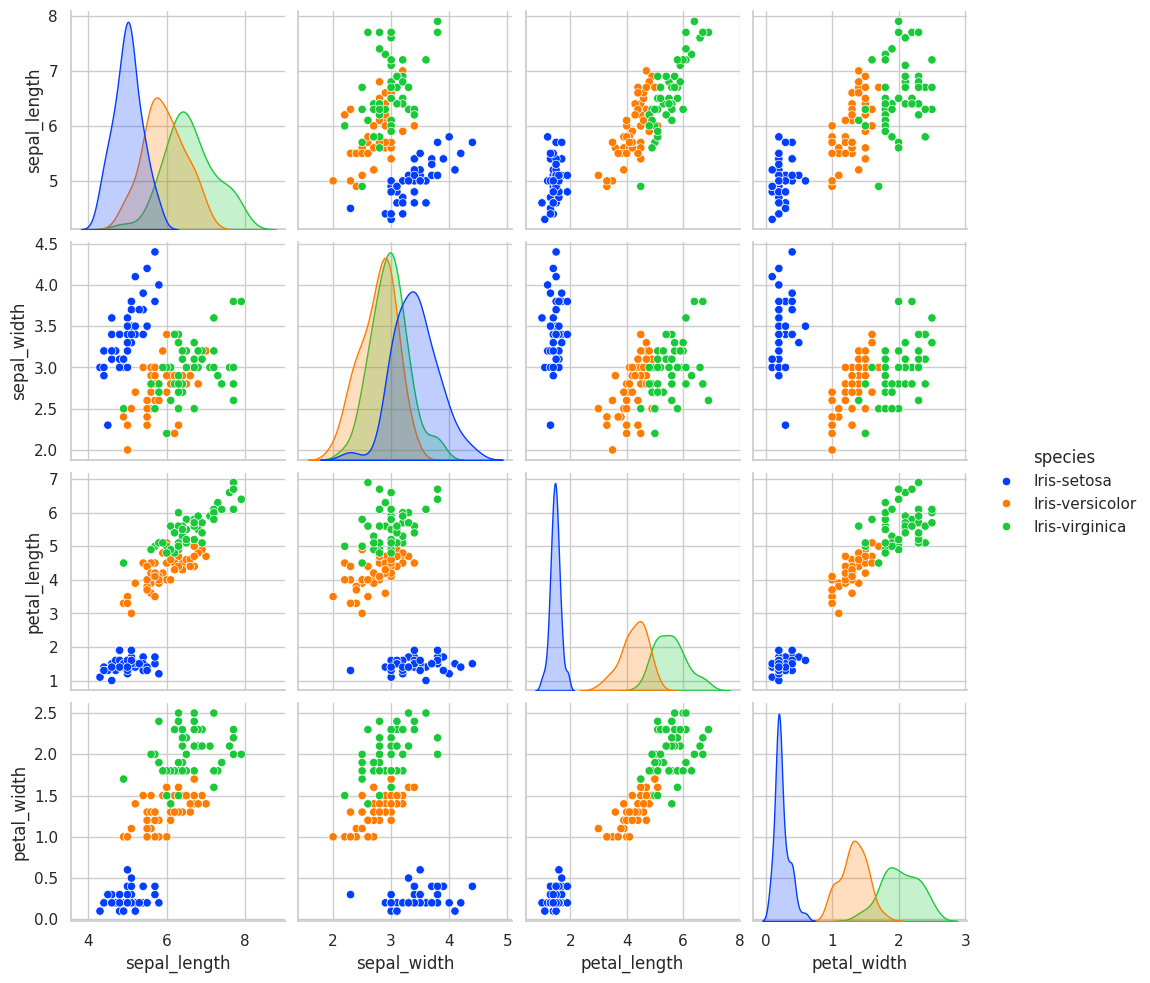

Logistic Regression
Accuracy: 0.9333333333333333
Precision: 0.9333333333333332
Confusion Matrix:
 [[10  0  0]
 [ 0  9  1]
 [ 0  1  9]]


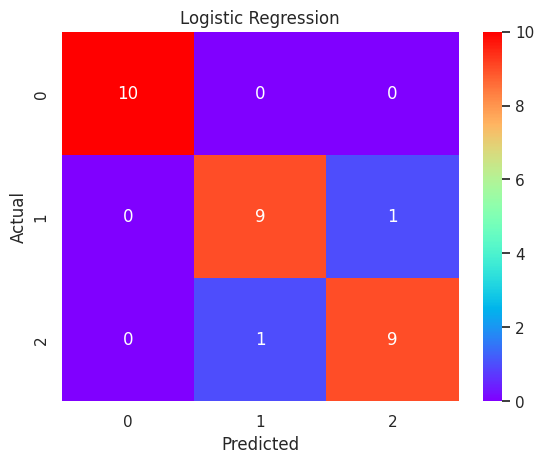

KNN
Accuracy: 0.9333333333333333
Precision: 0.9444444444444445
Confusion Matrix:
 [[10  0  0]
 [ 0 10  0]
 [ 0  2  8]]


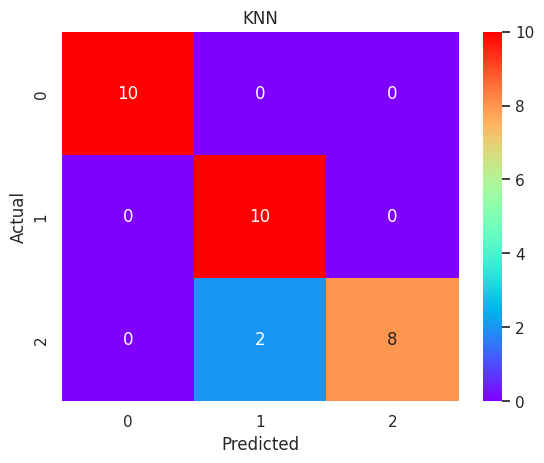

Decision Tree
Accuracy: 0.9
Precision: 0.9023569023569024
Confusion Matrix:
 [[10  0  0]
 [ 0  9  1]
 [ 0  2  8]]


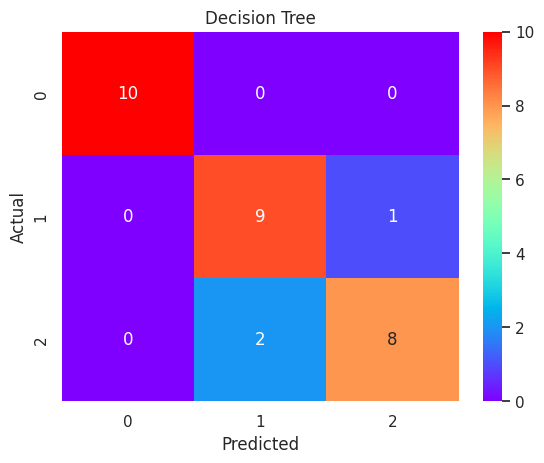

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix

df = pd.read_csv("IRIS.csv")

sns.set(style="whitegrid", palette="bright")

plt.figure(figsize=(12, 4))
for i, col in enumerate(df.columns[:-1]):
    plt.subplot(1, 4, i + 1)
    sns.histplot(df[col], kde=True)
plt.tight_layout()
plt.show()

sns.pairplot(df, hue="species")
plt.show()

X = df.drop("species", axis=1)
y = df["species"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

models = {
    "Logistic Regression": LogisticRegression(max_iter=200),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(random_state=42)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average="macro")
    cm = confusion_matrix(y_test, y_pred)
    print(name)
    print("Accuracy:", acc)
    print("Precision:", prec)
    print("Confusion Matrix:\n", cm)
    sns.heatmap(cm, annot=True, fmt="d", cmap="rainbow")
    plt.title(name)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()
